# Import Library

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures



# Import Dataset

In [59]:
df = pd.read_csv('./feature_store/merged.csv', index_col=0)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2504 entries, 0 to 2503
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cycle_id             2504 non-null   float64
 1   fasting              2504 non-null   bool   
 2   pond_id              2504 non-null   float64
 3   measured_date        2504 non-null   object 
 4   morning_temperature  2504 non-null   float64
 5   evening_temperature  2504 non-null   float64
 6   morning_do           2504 non-null   float64
 7   evening_do           2504 non-null   float64
 8   morning_salinity     2504 non-null   float64
 9   morning_pH           2504 non-null   float64
 10  transparency         2504 non-null   float64
 11  long_cycle           2504 non-null   int64  
 12  total_seed           2504 non-null   float64
 13  area                 2504 non-null   float64
 14  size                 2504 non-null   float64
 15  weight               2504 non-null   float6

In [61]:
df.head()

,cycle_id,fasting,pond_id,measured_date,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,morning_pH,transparency,long_cycle,total_seed,area,size,weight,num_of_harvest
0,3458.0,True,12969.0,2023-01-09 12:25:06.976744192,28.0,30.0,4.97,5.64,23.0,7.9,38.0,112,566669.0,4968.0,63.75,1845.732500,4.0
1,3459.0,True,12996.0,2023-01-09 12:25:06.976744192,28.0,30.0,4.97,5.64,23.0,7.9,38.0,121,566669.0,4968.0,64.00,1863.510000,4.0
2,4036.0,True,12685.0,2023-01-09 12:25:06.976744192,28.0,30.0,4.97,5.64,23.0,7.9,38.0,39,172250.0,800.0,350.00,220.500000,2.0
3,4038.0,True,14334.0,2023-01-09 12:25:06.976744192,28.0,30.0,4.97,5.64,23.0,7.9,38.0,94,350000.0,2700.0,89.00,1086.976667,6.0
4,4039.0,True,14335.0,2023-01-09 12:25:06.976744192,28.0,30.0,4.97,5.64,23.0,7.9,38.0,94,210000.0,1030.0,109.20,590.508000,5.0


# Preprocessing

In [62]:
df = df.drop(columns=["cycle_id", "pond_id", "measured_date"], axis=1)

In [63]:
df['fasting'] = df['fasting'].replace({True: 1, False: 0})


/var/folders/b9/pvmggz1d29v76kmwczpmh45c0000gn/T/ipykernel_15997/232860989.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fasting'] = df['fasting'].replace({True: 1, False: 0})


In [64]:
df.head()

,fasting,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,morning_pH,transparency,long_cycle,total_seed,area,size,weight,num_of_harvest
0,1,28.0,30.0,4.97,5.64,23.0,7.9,38.0,112,566669.0,4968.0,63.75,1845.732500,4.0
1,1,28.0,30.0,4.97,5.64,23.0,7.9,38.0,121,566669.0,4968.0,64.00,1863.510000,4.0
2,1,28.0,30.0,4.97,5.64,23.0,7.9,38.0,39,172250.0,800.0,350.00,220.500000,2.0
3,1,28.0,30.0,4.97,5.64,23.0,7.9,38.0,94,350000.0,2700.0,89.00,1086.976667,6.0
4,1,28.0,30.0,4.97,5.64,23.0,7.9,38.0,94,210000.0,1030.0,109.20,590.508000,5.0


# Feature Selection

## Mutual Information

In [65]:
target_column = 'weight'

In [66]:
# Mendefinisikan fitur dan variabel target
X = df.drop(target_column, axis=1)  # Fitur
y = df[target_column]  # Variabel target


In [67]:
# Menghitung informasi mutual
mi = mutual_info_regression(X, y, random_state=69)

In [68]:
mi_score = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print(mi_score)

total_seed             0.554034
area                   0.398150
size                   0.369292
long_cycle             0.311350
num_of_harvest         0.216564
morning_salinity       0.166007
morning_pH             0.111831
morning_temperature    0.098121
morning_do             0.052360
transparency           0.050725
evening_do             0.049680
evening_temperature    0.036420
fasting                0.007989
dtype: float64


In [69]:
mi_score_style = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_score_style = mi_score_style.sort_values(by='Mutual Information', ascending=False)

mi_score_style.style.background_gradient(low=0.7, high=1.0,cmap='YlOrRd')

,Feature,Mutual Information
9,total_seed,0.554034
10,area,0.398150
11,size,0.369292
8,long_cycle,0.311350
12,num_of_harvest,0.216564
5,morning_salinity,0.166007
6,morning_pH,0.111831
1,morning_temperature,0.098121
3,morning_do,0.052360
7,transparency,0.050725


# Feature Engineering

## Mathematical Transformations

In [70]:
# Fungsi untuk menghitung Mutual Information

#def calculate_mutual_information(X, y):
#    mi = mutual_info_regression(X, y)
#    return mi

In [71]:
# Fungsi untuk membuat transformasi berdasarkan fitur-fitur penting

#def create_transformation(X, y, threshold=0.1):
#    mi = calculate_mutual_information(X, y)
#    significant_features = X.columns[mi > threshold]
#    transformations = {}
#    for feature in significant_features:
#        transformations[feature] = lambda x: np.log(x + 1)  # Misalnya, transformasi logaritma
#    return transformations

In [72]:
# Fungsi untuk menjalankan transformasi keseluruhan

#def overall_transformation(X, transformations):
#    transformed_features = {}
#    for feature, transformation in transformations.items():
#        transformed_features[feature] = transformation(X[feature])
#    return transformed_features

In [73]:
#transformations = create_transformation(X, y)

In [74]:
#transformed_features = overall_transformation(X, transformations)

In [75]:
#transformed_df = pd.DataFrame(transformed_features)

In [76]:
#transformed_df

In [77]:
#transformed_df.to_csv("./feature_store/transformed_mutual_information.csv", index=False)

In [78]:
top_features = mi_score.index[:5] 

In [79]:
# MEMBUAT POLYNOMIAL FEATURES

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X[top_features])
poly_feature_names = poly.get_feature_names_out(top_features)

In [80]:
# MEMBUAT DF DENGAN POLYNOMIAL FEATURES

poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

In [81]:
# TAMBAH FEATURES POLY KE DF UTAMA

data_with_poly_features = pd.concat([df, poly_df], axis=1)

In [82]:
data_with_poly_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2504 entries, 0 to 2503
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fasting                    2504 non-null   int64  
 1   morning_temperature        2504 non-null   float64
 2   evening_temperature        2504 non-null   float64
 3   morning_do                 2504 non-null   float64
 4   evening_do                 2504 non-null   float64
 5   morning_salinity           2504 non-null   float64
 6   morning_pH                 2504 non-null   float64
 7   transparency               2504 non-null   float64
 8   long_cycle                 2504 non-null   int64  
 9   total_seed                 2504 non-null   float64
 10  area                       2504 non-null   float64
 11  size                       2504 non-null   float64
 12  weight                     2504 non-null   float64
 13  num_of_harvest             2504 non-null   float64
 1

In [83]:
data_with_poly_features.head()

,fasting,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,morning_pH,transparency,long_cycle,total_seed,...,area^2,area size,area long_cycle,area num_of_harvest,size^2,size long_cycle,size num_of_harvest,long_cycle^2,long_cycle num_of_harvest,num_of_harvest^2
0,1,28.0,30.0,4.97,5.64,23.0,7.9,38.0,112,566669.0,...,24681024.0,316710.0,556416.0,19872.0,4064.0625,7140.0,255.0,12544.0,448.0,16.0
1,1,28.0,30.0,4.97,5.64,23.0,7.9,38.0,121,566669.0,...,24681024.0,317952.0,601128.0,19872.0,4096.0000,7744.0,256.0,14641.0,484.0,16.0
2,1,28.0,30.0,4.97,5.64,23.0,7.9,38.0,39,172250.0,...,640000.0,280000.0,31200.0,1600.0,122500.0000,13650.0,700.0,1521.0,78.0,4.0
3,1,28.0,30.0,4.97,5.64,23.0,7.9,38.0,94,350000.0,...,7290000.0,240300.0,253800.0,16200.0,7921.0000,8366.0,534.0,8836.0,564.0,36.0
4,1,28.0,30.0,4.97,5.64,23.0,7.9,38.0,94,210000.0,...,1060900.0,112476.0,96820.0,5150.0,11924.6400,10264.8,546.0,8836.0,470.0,25.0


## Feature Engineering Exploration Using Mathematical Transformations

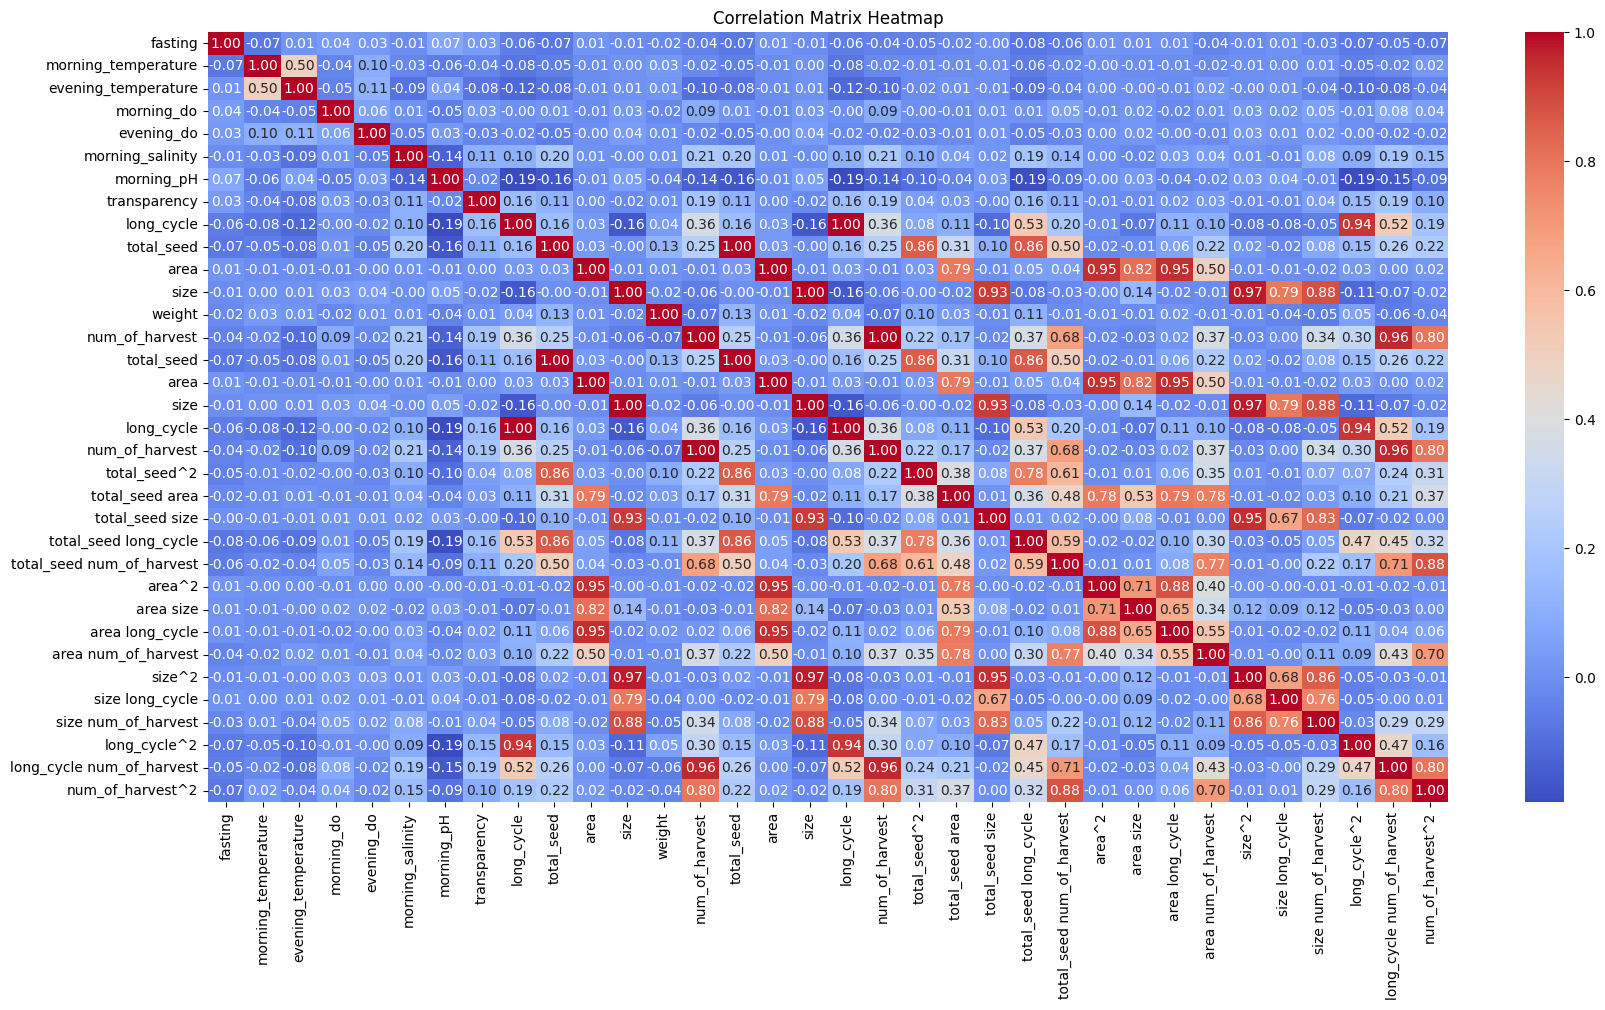

In [84]:
plt.figure(figsize=(20, 10))
correlation_matrix = data_with_poly_features.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [85]:
#sns.pairplot(data_with_poly_features)
#plt.suptitle('Scatter Plot Matrix', y=1.02)
#plt.show()

In [86]:
#transformed_df[["morning_temperature", "morning_pH"]].plot()

In [87]:
#df[["morning_temperature", "morning_pH"]].plot()